In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot

INDICATORS = "../dataset/indicators.csv"
INDICATORS_NO_OUTLIER = "../dataset/indicators_no_outlier.csv"
NO_OUTLIER = "../dataset/customer_supermarket_no_outlier.csv"

In [2]:
ind_no_outlier = pd.read_csv(INDICATORS_NO_OUTLIER, index_col='CustomerID')
#ind_no_outlier.CustomerID = ind_no_outlier.CustomerID.astype(int)
print(ind_no_outlier.head())
print(ind_no_outlier.info())

             Entropy     i   iu  imax  tot_sales  mean_sales
CustomerID                                                  
12347       1.945910  2458  103   319     481.21   68.744286
12348       1.386294  2341   22  1254     178.71   44.677500
12350      -0.000000   197   17   197      65.30   65.300000
12352       2.079442   473   59    98    1337.42  167.177500
12353      -0.000000    20    4    20      24.30   24.300000
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4183 entries, 12347 to 18287
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Entropy     4183 non-null   float64
 1   i           4183 non-null   int64  
 2   iu          4183 non-null   int64  
 3   imax        4183 non-null   int64  
 4   tot_sales   4183 non-null   float64
 5   mean_sales  4183 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 228.8 KB
None


### Scaling values in order to avoid bias by using a standard scaler

In [3]:
#ind_no_outlier = ind_no_outlier.drop(['Entropy'], axis=1)

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [5]:
scaler = MinMaxScaler()
# we could also try with the standard scaler
scaler.fit(ind_no_outlier.values)

MinMaxScaler()

In [6]:
ind_no_outlier.head().values

array([[ 1.94591015e+00,  2.45800000e+03,  1.03000000e+02,
         3.19000000e+02,  4.81210000e+02,  6.87442857e+01],
       [ 1.38629436e+00,  2.34100000e+03,  2.20000000e+01,
         1.25400000e+03,  1.78710000e+02,  4.46775000e+01],
       [-0.00000000e+00,  1.97000000e+02,  1.70000000e+01,
         1.97000000e+02,  6.53000000e+01,  6.53000000e+01],
       [ 2.07944154e+00,  4.73000000e+02,  5.90000000e+01,
         9.80000000e+01,  1.33742000e+03,  1.67177500e+02],
       [-0.00000000e+00,  2.00000000e+01,  4.00000000e+00,
         2.00000000e+01,  2.43000000e+01,  2.43000000e+01]])

In [7]:
scaler.transform(ind_no_outlier.head().values)

array([[0.5481051 , 0.18668794, 0.32484076, 0.2209868 , 0.1951742 ,
        0.21562885],
       [0.39047795, 0.17779804, 0.06687898, 0.87074357, 0.07243972,
        0.13995189],
       [0.        , 0.01489249, 0.05095541, 0.1362057 , 0.02642544,
        0.20479844],
       [0.58571693, 0.03586354, 0.18471338, 0.06740792, 0.54256756,
        0.52514779],
       [0.        , 0.00144366, 0.00955414, 0.01320361, 0.00979036,
        0.07587573]])

In [8]:
X = scaler.fit_transform(ind_no_outlier.values)

## K-Means

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### Computing the best K

In [10]:
silhouette_list = list()
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, n_init=10, max_iter=150)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_list.append((silhouette_score(X, labels, metric='euclidean'),i))
    
print(silhouette_list)

[(0.33156676036106447, 3), (0.3410003302470588, 4), (0.3082875360510965, 5), (0.32264077845274974, 6), (0.32314460908750775, 7), (0.301977120086405, 8), (0.3039368193932974, 9)]


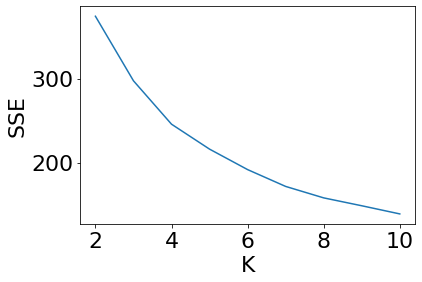

In [11]:
sse_list = list()
max_k = 10
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(X)
    
    sse = kmeans.inertia_
    sse_list.append(sse)
    
plt.plot(range(2, len(sse_list) + 2), sse_list)
plt.ylabel('SSE', fontsize=22)
plt.xlabel('K', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

According to both the elbow method and silhouette score method the best value for K seems to be 4

### Clustering with K-Means

In [12]:
kmeans = KMeans(n_clusters=4, n_init=10, max_iter=150)
kmeans.fit(X)
labels = kmeans.labels_

In [13]:
kmeans.labels_

array([0, 0, 1, ..., 1, 2, 0], dtype=int32)

size of each cluster

In [14]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([1329, 1800,  466,  588]))

In [15]:
labels_list = ['Cluster'+str(x) for x in np.unique(kmeans.labels_, return_counts=True)[0]]
fig = px.bar(x=labels_list,y=np.unique(kmeans.labels_, return_counts=True)[1], title="Elements per cluster")
fig.update_xaxes(title="")
fig.update_yaxes(title="")
fig.show()

In [16]:
values = np.unique(kmeans.labels_, return_counts=True)[1]
fig = go.Figure(data=[go.Pie(labels=labels_list, values=values)])
fig.show()

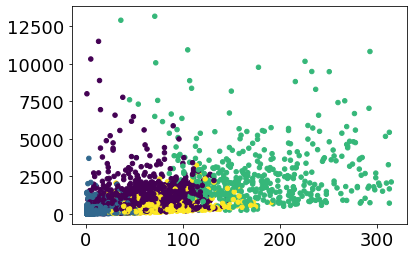

In [17]:
plt.scatter(ind_no_outlier['iu'], ind_no_outlier['i'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

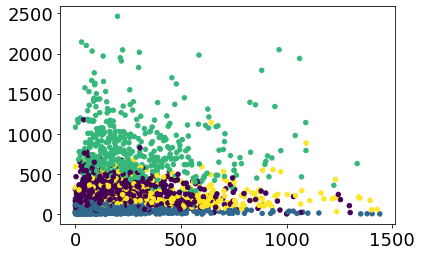

In [18]:
plt.scatter(ind_no_outlier['imax'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

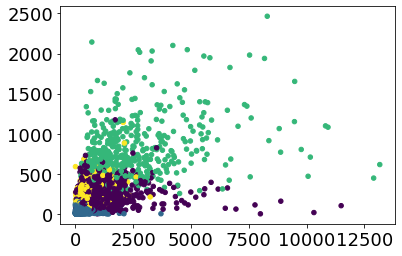

In [19]:
plt.scatter(ind_no_outlier['i'], ind_no_outlier['tot_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

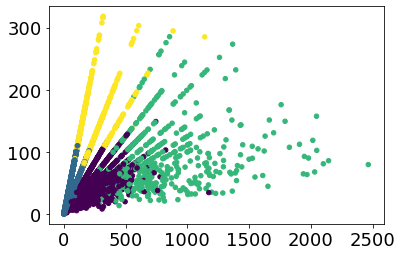

In [20]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

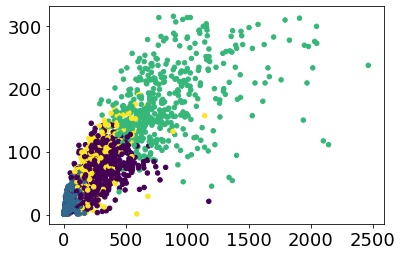

In [21]:
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['iu'], 
            c=kmeans.labels_, s=20)
plt.tick_params(labelsize=18)
plt.show()

### Cluster Centers visualization

In [22]:
kmeans.cluster_centers_

array([[0.42857729, 0.07381158, 0.17511131, 0.13402732, 0.09007196,
        0.14321356],
       [0.0660679 , 0.01656933, 0.05292109, 0.11211181, 0.02197611,
        0.12809847],
       [0.61505033, 0.19619842, 0.55859599, 0.19694023, 0.33075272,
        0.29881983],
       [0.11154441, 0.03805732, 0.20656224, 0.23093205, 0.08939798,
        0.43239958]])

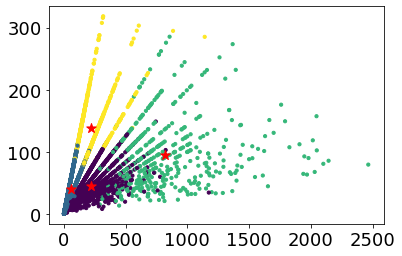

[222.16764635  54.33386167 815.36630901 220.50651531] 
 [ 45.71477742  40.90787556  95.20068325 137.6817157 ]


In [23]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], c=kmeans.labels_, 
            s=10)
plt.scatter(centers[:, 4], centers[:, 5], s=100, marker='*', c='r')
plt.tick_params(axis='both', which='major', labelsize=18)
plt.show()

print(centers[:, 4], "\n", centers[:, 5])

### Cluster Centers as parallel coordinates

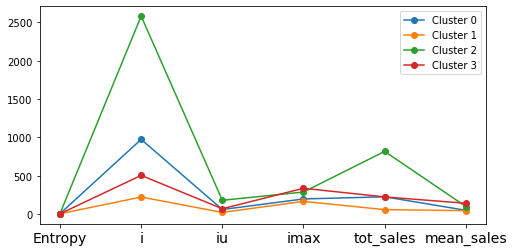

In [24]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks(range(0, len(ind_no_outlier.columns)), ind_no_outlier.columns, fontsize=14)
plt.legend(fontsize=10)
plt.show()

### Centroids radar chart

/Users/tommasocolella/opt/anaconda3/envs/skmob/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



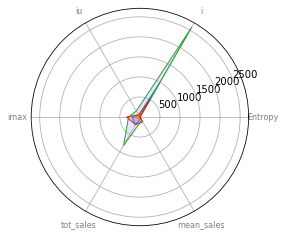

In [25]:
from math import pi
 

# number of variable
N = len(ind_no_outlier.columns)
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
for i in range(0, len(centers)):
    angles = [n / float(N) * 2 * pi for n in range(N)]
    values = centers[i].tolist()
    values += values[:1]
    angles += angles[:1]
    # Initialise the spider plot
    ax = plt.subplot(polar=True)
# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], ind_no_outlier.columns, color='grey', size=8) 
# Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')
 # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)
    
plt.show()

In [26]:
fig = make_subplots(rows=2, cols=2, specs=[[{'type': 'polar'}]*2]*2)

fig.add_trace(go.Scatterpolar(
        r = centers[0],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[1],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 1, 2)
fig.add_trace(go.Scatterpolar(
        r = centers[2],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 1)
fig.add_trace(go.Scatterpolar(
        r = centers[3],
        theta=ind_no_outlier.columns,
        fill='toself'
    ), 2, 2)

fig.update_layout(height=1000, width=1000,
  polar=dict(
    radialaxis=dict(
      visible=True
    ),
  ),
  showlegend=False,
  font=dict(
      size=15
  )
)

fig.show()

### SSE and Clustering Validation

In [27]:
from sklearn import metrics
print('SSE %s' % kmeans.inertia_)
print('Silhouette %s' % silhouette_score(X, kmeans.labels_))
print('Separation %s' % metrics.davies_bouldin_score(X, kmeans.labels_))

SSE 245.67119354294238
Silhouette 0.34081285108181614
Separation 1.0986113148633807


## DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

In [29]:
dbscan = DBSCAN(eps=0.15, min_samples=10)
dbscan.fit(X)

DBSCAN(eps=0.15, min_samples=10)

In [30]:
dbscan.labels_

array([ 0, -1,  1, ...,  0, -1,  0])

In [31]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 274, 2442, 1467]))

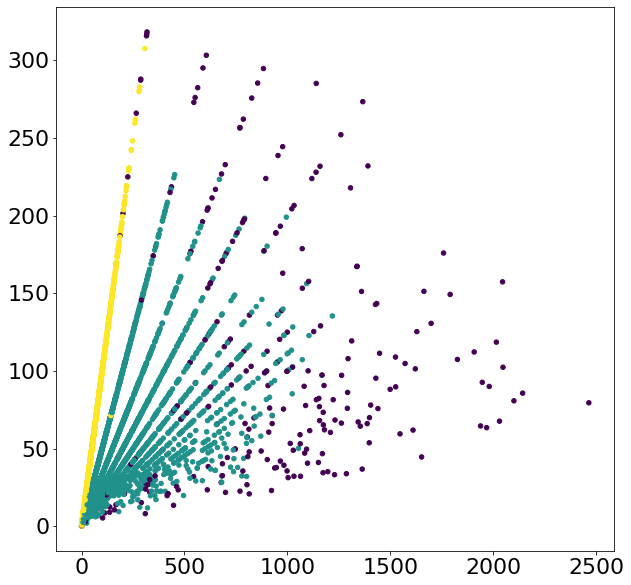

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(ind_no_outlier['tot_sales'], ind_no_outlier['mean_sales'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [33]:
print('Silhouette %s' % silhouette_score(X, dbscan.labels_))

Silhouette 0.2917960014908513


Best eps with knee method

In [34]:
from scipy.spatial.distance import pdist, squareform

In [35]:
dist = pdist(X, 'euclidean') #pair wise distance
print (dist)
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.73105694 0.66387299 0.53279352 ... 1.07133743 0.36185839 0.94047801]

[[0.         0.73105694 0.66387299 ... 0.55865088 0.6392608  0.3598479 ]
 [0.73105694 0.         0.85154747 ... 0.86218157 1.25054161 0.55584222]
 [0.66387299 0.85154747 0.         ... 0.23898292 1.16457486 0.41845271]
 ...
 [0.55865088 0.86218157 0.23898292 ... 0.         1.07133743 0.36185839]
 [0.6392608  1.25054161 1.16457486 ... 1.07133743 0.         0.94047801]
 [0.3598479  0.55584222 0.41845271 ... 0.36185839 0.94047801 0.        ]]


In [36]:
k = 3
kth_distances = list()
for d in dist:
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

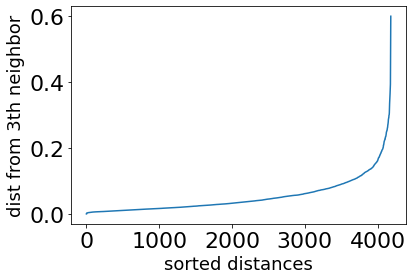

In [37]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
plt.xlabel('sorted distances', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

## Hierarchical clustering

In [38]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

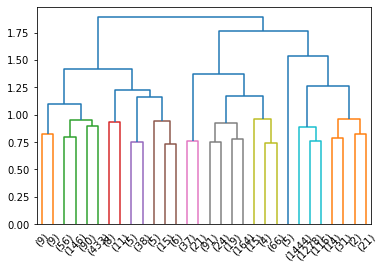

In [39]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

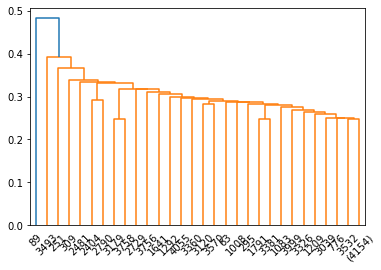

In [40]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, color_threshold=0.4, truncate_mode='lastp')

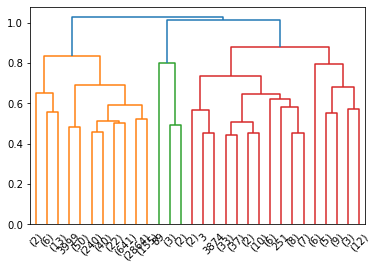

In [41]:
data_dist = pdist(X, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, color_threshold=1, truncate_mode='lastp')

## Alternative clustering techniques

## X-means

In [58]:
mat = np.asmatrix(ind_no_outlier).tolist()

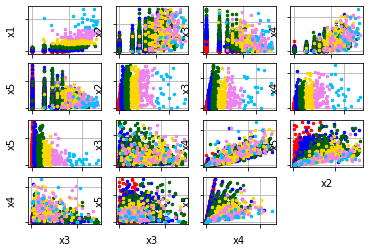

In [59]:
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.xmeans import xmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

amount_initial_centers = 2
initial_centers = kmeans_plusplus_initializer(mat, amount_initial_centers).initialize()
# Create instance of X-Means algorithm. The algorithm will start analysis from 2 clusters, the maximum
# number of clusters that can be allocated is 10.
xmeans_instance = xmeans(mat, initial_centers, 6, ccore=False)
xmeans_instance.process()
# Extract clustering results: clusters and their centers
clusters = xmeans_instance.get_clusters()
centers = xmeans_instance.get_centers()
# Visualize clustering results

visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, mat)
# visualizer.append_cluster(centers, None, marker='*', markersize=10)
fig = visualizer.show()

In [ ]:
type(visualizer.show())

## BIRCH

In [38]:
from pyclustering.cluster.birch import birch
from pyclustering.cluster import cluster_visualizer_multidim

# Create BIRCH algorithm
birch_instance = birch(mat, 6, diameter=1.5)
 
# Cluster analysis
birch_instance.process()
 
# Obtain results of clustering
clusters = birch_instance.get_clusters()
 
# Visualize allocated clusters
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, mat)
visualizer.show()

Error in callback <function flush_figures at 0x7ffc25e5a9e0> (for post_execute):


KeyboardInterrupt: 

<Figure size 576x576 with 0 Axes>

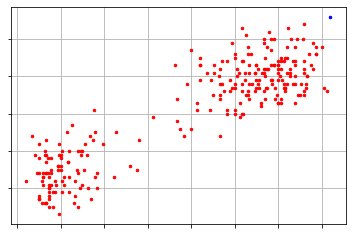

In [57]:
from pyclustering.cluster.birch import birch, measurement_type
from pyclustering.cluster import cluster_visualizer
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FAMOUS_SAMPLES
import matplotlib.pyplot as plt


# Sample for cluster analysis (represented by list)
sample = read_sample(FAMOUS_SAMPLES.SAMPLE_OLD_FAITHFUL)
# Create BIRCH algorithm
birch_instance = birch(sample, 2)
# Cluster analysis
birch_instance.process()
# Obtain results of clustering
clusters = birch_instance.get_clusters()
# Visualize allocated clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, sample)
fig = visualizer.show()

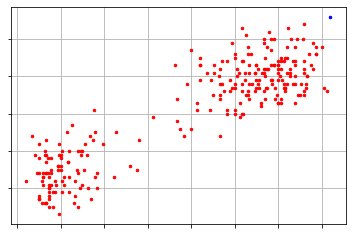

In [42]:
fig = visualizer.show()

In [43]:
type(fig)

matplotlib.figure.Figure

In [55]:
fig.set_size_inches(15,15)

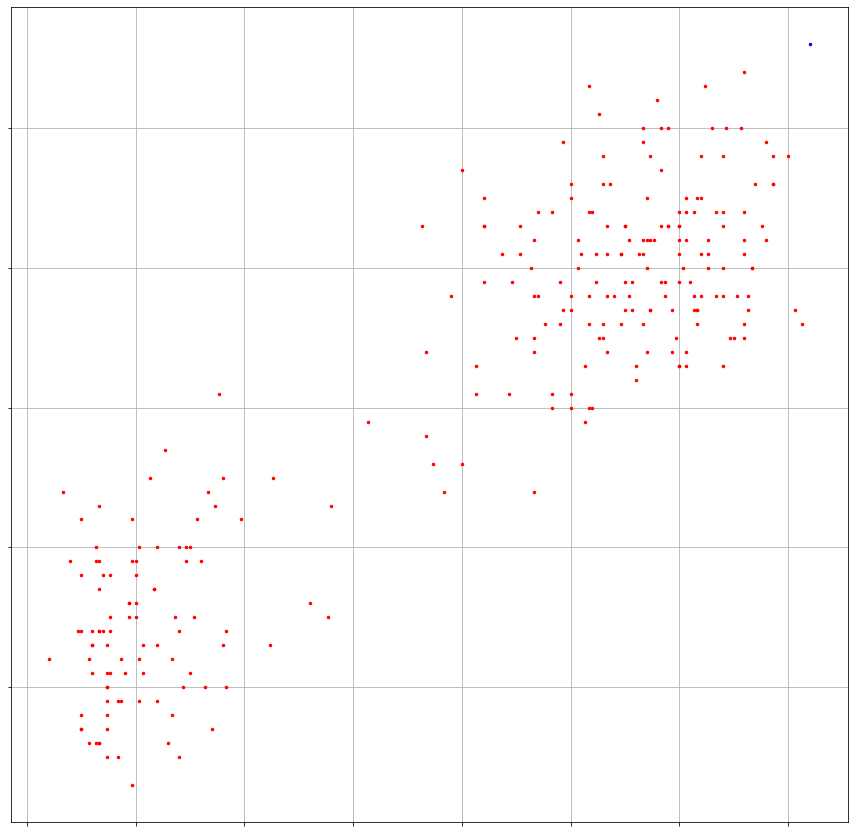

In [56]:
fig